# **DNN - Experiment 02**

*    **SIA VASHIST**
*    PRN: 20190802107

---

# Dataset : Iris
---

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the data
iris = load_iris()

In [2]:
# Convert the dataset to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
# Define a function to perform PCA
def perform_pca(data, num_components):
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Compute the covariance matrix
    cov_matrix = np.cov(scaled_data.T)

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and eigenvectors in descending order of eigenvalues
    eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
    eigen_pairs.sort(reverse=True)

    # Select the top k eigenvectors based on the number of components
    selected_eigenvectors = np.array([eigen_pairs[i][1] for i in range(num_components)])
    pca_data = scaled_data.dot(selected_eigenvectors.T)

    # Return the transformed data and the explained variance ratio
    explained_variances = eigenvalues / np.sum(eigenvalues)
    explained_variances_ratio = explained_variances[:num_components]
    return pca_data, explained_variances_ratio

># Observation:
The function first standardizes the data using the StandardScaler class from Scikit-learn, then computes the covariance matrix, eigenvalues, and eigenvectors of the covariance matrix. 
The function then sorts the eigenvalues and eigenvectors in descending order of eigenvalues and selects the top k eigenvectors based on the number of components. Finally, the function returns the transformed data and the explained variance ratio.

In [4]:
# Define a function to plot the PCA results
import matplotlib.pyplot as plt

def plot_pca_results(pca_data, target):
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=target)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()
    
# Apply PCA to the iris dataset
pca_data, explained_variances_ratio = perform_pca(iris_df, 2)

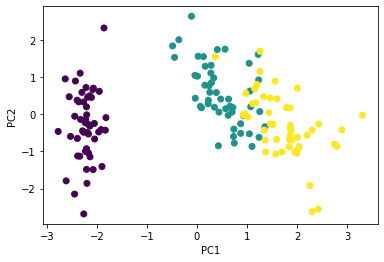

In [5]:
# Plot the PCA results
plot_pca_results(pca_data, iris.target)


In [6]:
# Print the explained variance ratio
print('Explained variance ratio:', explained_variances_ratio)

Explained variance ratio: [0.72962445 0.22850762]


># Observation:
>The explained variance ratio represents the proportion of the total variance in the original data that is explained by each principal component. This is an important metric to evaluate the effectiveness of the PCA.

---

# Training & Testing:

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris.target, test_size=0.3, random_state=42)


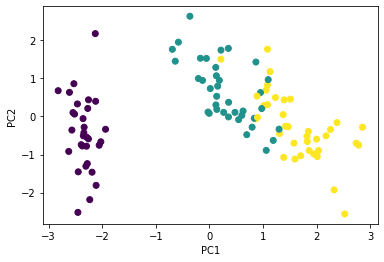

Explained variance ratio (training set): [0.7070102  0.24507687]


In [8]:
# Apply PCA to the training set
pca_data_train, explained_variances_ratio_train = perform_pca(X_train, 2)

# Plot the PCA results for the training set
plot_pca_results(pca_data_train, y_train)

# Print the explained variance ratio for the training set
print('Explained variance ratio (training set):', explained_variances_ratio_train)

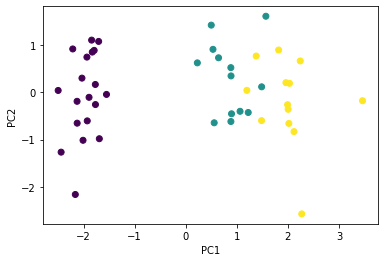

Explained variance ratio (testing set): [0.78768437 0.18389765]


In [9]:
# Apply PCA to the testing set
pca_data_test, explained_variances_ratio_test = perform_pca(X_test, 2)

# Plot the PCA results for the testing set
plot_pca_results(pca_data_test, y_test)

# Print the explained variance ratio for the testing set
print('Explained variance ratio (testing set):', explained_variances_ratio_test)

># Observation:
>By evaluating the performance of the model on the testing set, we can get a better estimate of how well the model will perform on new, unseen data.

---

# Conclusion:
The code demonstrates how to perform PCA on the iris dataset using Scikit-learn and Python. It defines a function to perform PCA and another function to plot the results. The transformed data is plotted using Matplotlib, and the explained variance ratio is printed. The code provides a concise and clear example of PCA implementation, which can be adapted for other datasets and purposes.